<a href="https://colab.research.google.com/github/Vigneshthanga/258-Deep-Learning/blob/master/Assignment-1/Classification_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Digit Image Classification using Keras Library of Tensorflow 2.0

##1. Importing Tensorflow 2.0 for Keras

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


##2. Importing MNIST digit data from Keras library.

In [0]:
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

##3. 60,000 Train data of 28x28 grayscale images of the 10 digits Images 

In [6]:
train_images.shape

(60000, 28, 28)

##4. 10,000 Test data of digit Images

In [9]:
test_images.shape

(10000, 28, 28)

##5. Visualizing a sample train data and it's label.

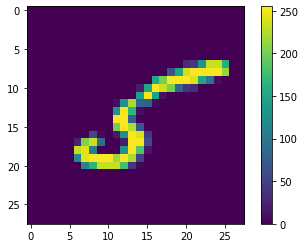

The corresponding lable: 5


In [12]:
plt.figure()
plt.imshow(train_images[11])
plt.colorbar()
plt.grid(False)
plt.show()
print("The corresponding lable: "+str(train_labels[11]))

##6. Scale the pixel values of data from 0 to 1.

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0
class_names = ['0','1','2','3','4','5','6','7','8','9']

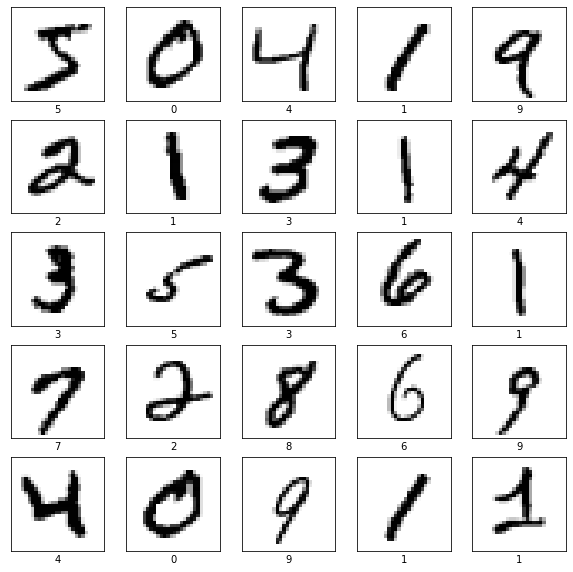

In [20]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

##7. Building the Network with 784 Neuron in Input layer, two 128 Neurons dense layers and then the 10 node output layer each representing the class label.

In [0]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)), keras.layers.Dense(128, activation='relu'),keras.layers.Dense(10)])

##8.Compiling with model with parameters like loss function, optimizer and metrics to monitor the training

In [0]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

##9. Fit the model with train data. We are using 10 epochs. As we can see in each epoch the accuracy kept increasing.

In [27]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2599 - accuracy: 0.9260
Epoch 2/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.1161 - accuracy: 0.9648
Epoch 3/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0796 - accuracy: 0.9759
Epoch 4/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0590 - accuracy: 0.9823
Epoch 5/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0461 - accuracy: 0.9855
Epoch 6/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0349 - accuracy: 0.9890
Epoch 7/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0284 - accuracy: 0.9915
Epoch 8/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0228 - accuracy: 0.9929
Epoch 9/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0193 - accuracy: 0.9941
Epoch 10/10
60

##10. Get the probability model from keras. It gives the logits. The softmax layer will convert the logits to probabilities for easy interpretation.

In [0]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

##11. We can get the prediction probability of 11th image in test data. We can clearly see the probability of the number being 6 is 9.9

In [32]:
predictions = probability_model.predict(test_images)
print(predictions.shape)
predictions[11]

(10000, 10)


array([1.8515807e-06, 6.9550411e-14, 2.5821456e-09, 2.9679964e-10,
       4.0762869e-09, 3.4066679e-07, 9.9999392e-01, 9.9765940e-10,
       3.7778514e-06, 6.0145335e-13], dtype=float32)

##12. Apply argmax to get the predicted class for that image. 

In [34]:
np.argmax(predictions[11])

6

##13. Verify this with test data.

In [35]:
test_labels[11]

6

##14. Visualizing the probaility with matplotlib library.

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

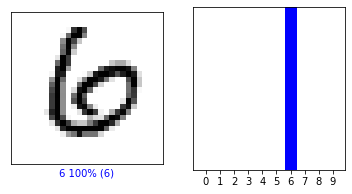

In [38]:
i = 11
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()